<a href="https://colab.research.google.com/github/labrijisaad/Git-Clustering/blob/main/notebooks/Performance and Scalability Benchmark/GIT Performance and Scalability Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/labrijisaad/Git-Clustering/blob/main/notebooks/Performance and Scalability Benchmark/GIT Performance and Scalability Benchmark.ipynb" target="_blank">
  <img src="https://img.shields.io/badge/Open%20in-GitHub-blue.svg" alt="Open In GitHub"/>
</a>

## <center><a><span style="color:blue">`Evaluating GIT` - Performance and Scalability Benchmarking</span></a></center>

#### Objective

The primary aim of this notebook is to conduct a detailed performance and scalability benchmarking of the GIT clustering algorithm. Through a series of experiments, we assess how the GIT algorithm scales with changes in three key dimensions:

- **N (Size of the Dataset):** Understand how the performance of GIT varies with increasing numbers of data points.
- **D (Dimensionality of the Data):** Evaluate the impact of data dimensionality on GIT's runtime performance.
- **K (Algorithm's Internal Parameter):** Investigate how variations in the GIT algorithm's parameter `k` affect its execution time.

This benchmarking will be carried out using synthetic datasets generated through the `make_blobs` function, allowing for controlled experimentation across different scenarios. The results will provide insights into the scalability and efficiency of GIT, crucial for determining its applicability to real-world datasets and problems.

#### Install the `GIT package` ( Install this if needed )

In [1]:
# !pip install -i "https://test.pypi.org/simple/" git_cluster > /dev/null 

#### Import the Libraries

In [2]:
# General imports
import warnings ; warnings.filterwarnings('ignore')
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time


# GIT Clustring Algo
from git_cluster import GIT

# Sklearn imports
from sklearn.datasets import make_blobs

# Jupyter Notebook specific imports
from tqdm.notebook import tqdm

### <center><a><span style="color:green">`Experiment 1` - Varying N (Size of the Dataset)</span></a></center>
 Here, detail the first set of experiments where you vary the size of the dataset (`N`) and measure the time it takes for the GIT algorithm to complete clustering. Include code to generate the datasets, run the GIT clustering, and plot the results. Conclude with an analysis of how GIT's performance changes with dataset size.

In [3]:
def benchmark_git(dataset_sizes, k=50, n_features=10, centers=5, random_state=None, verbose=False):
    """
    Benchmark GIT algorithm over a series of dataset sizes with varying parameters.
    
    :param dataset_sizes: List of integers representing the number of samples in each dataset.
    :param k: The 'k' parameter for the GIT algorithm. Default is 50.
    :param n_features: The number of features for the dataset. Default is 10.
    :param centers: The number of centers to generate for the synthetic dataset. Default is 5.
    :param random_state: The seed for the random number generator.
    :param verbose: If True, print additional information during the benchmarking.
    :return: Dictionary containing benchmarking information and execution times for each dataset size.
    """
    results = {
        'dataset_sizes': dataset_sizes,
        'execution_times': [],
        'k': k,
        'n_features': n_features,
        'centers': centers
    }
    
    if random_state is not None:
        np.random.seed(random_state)
    
    for n in tqdm(dataset_sizes, desc='Benchmarking GIT Performance - Varying Dataset Size'):
        # Generate synthetic dataset
        X, _ = make_blobs(n_samples=n, n_features=n_features, centers=centers, random_state=random_state)
        
        # Measure execution time
        start_time = time.time()
        model = GIT(k=k, target_ratio=[1., 1])
        model.fit_predict(X)
        end_time = time.time()
        
        results['execution_times'].append(end_time - start_time)
    return results

# Benchmarking
N = [int(x) for x in np.linspace(1e3, 1e5, 26)]
benchmark_results = benchmark_git(N, k=20, random_state=2021, verbose=True)

Benchmarking GIT Performance - Varying Dataset Size:   0%|          | 0/26 [00:00<?, ?it/s]

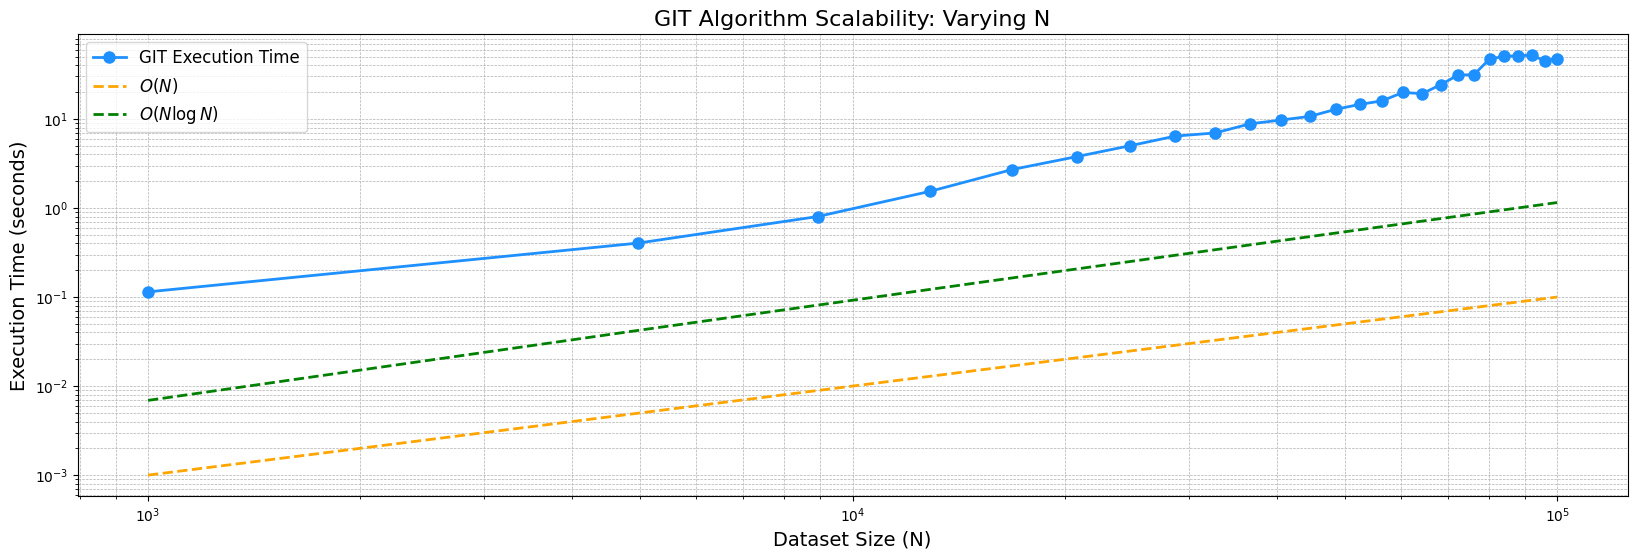

In [4]:
N = benchmark_results['dataset_sizes']
execution_times = benchmark_results['execution_times']

# Plot the actual GIT execution times
plt.figure(figsize=(20, 6))
plt.plot(N, execution_times, marker='o', linestyle='-', color='dodgerblue', lw=2, markersize=8, label='GIT Execution Time')

# Generate theoretical complexity curves based on the dataset sizes
N_array = np.array(N)
O_N = 1e-6 * N_array  # O(N) complexity
O_N_log_N = 1e-6 * N_array * np.log(N_array)  # O(N log N) complexity

# Plot the theoretical complexity curves
plt.plot(N, O_N, linestyle='--', color='orange', lw=2, label='$O(N)$')
plt.plot(N, O_N_log_N, linestyle='--', color='green', lw=2, label='$O(N\log N)$')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Dataset Size (N)', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.title('GIT Algorithm Scalability: Varying N', fontsize=16)

# Add grid for better readability
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Enhance the legend
plt.legend(fontsize=12, loc='upper left')

# Save Figure
plt.savefig('./Benchmark Figures/git_algorithm_performance_varying_N.png')

# Display the plot
plt.show()

### <center><a><span style="color:green">`Experiment 2` - Varying D (Dimensionality of the Data)</span></a></center>
Describe the methodology for testing how changes in the dimensionality of the data (`D`) affect GIT's runtime. This should include generating datasets with varying dimensions, executing GIT clustering, and plotting the execution times against `D`. Provide insights into the scalability of GIT with respect to data dimensionality.

Benchmarking GIT Performance - Varying Dimensions:   0%|          | 0/8 [00:00<?, ?it/s]

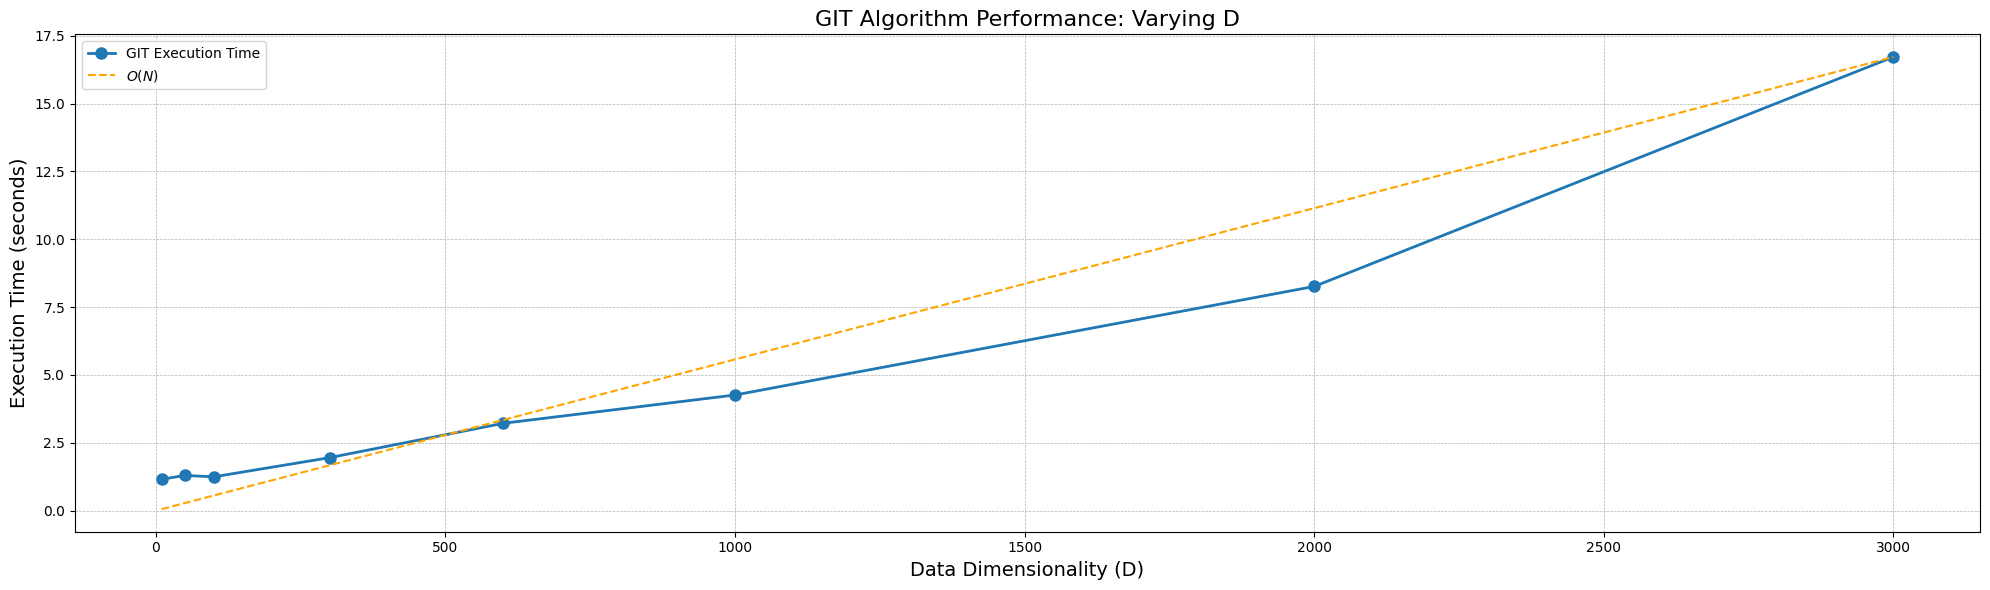

In [5]:
def benchmark_git_dimensionality(dimensions, n_samples=10000, centers=5, k=10, random_state=2021):
    """
    Benchmark GIT algorithm over different data dimensionalities and record execution time.

    :param dimensions: List of feature dimensions to test.
    :param n_samples: Number of samples to generate for the blobs.
    :param centers: Number of centers to generate for the blobs.
    :param k: The 'k' parameter for the GIT algorithm.
    :param random_state: Seed for random number generation.
    :return: A list of execution times corresponding to each dimensionality.
    """
    times = []
    for d in tqdm(dimensions, desc='Benchmarking GIT Performance - Varying Dimensions'):
        try:
            # Set seed for reproducibility
            np.random.seed(random_state)
            X, _ = make_blobs(n_samples=n_samples, n_features=d, centers=centers, random_state=random_state)
            
            start_time = time.time()
            git = GIT(k=k, target_ratio=[1., 1])
            git.fit_predict(X)
            times.append(time.time() - start_time)
        except Exception as e:
            print(f"An error occurred with dimension {d}: {e}")
            times.append(None)
    return times

# Define the dimensions to test and run benchmark
D = [10, 50, 100, 300, 600, 1000, 2000, 3000]
change_d_GIT = benchmark_git_dimensionality(D)

# Calculate theoretical complexity values
D_array = np.array(D)
O_N = D_array  # O(N)

# Normalize the theoretical complexity values for visualization
max_exec_time = max(change_d_GIT)
O_N = O_N / max(O_N) * max_exec_time

# Plotting the results with complexity curves
plt.figure(figsize=(20, 6))
plt.plot(D, change_d_GIT, 'o-', color='#1f77b4', markersize=8, linewidth=2, label='GIT Execution Time')
plt.plot(D, O_N, '--', color='orange', label='$O(N)$')

# Add labels, title, legend, and grid
plt.xlabel('Data Dimensionality (D)', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.title('GIT Algorithm Performance: Varying D', fontsize=16)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Save Figure
plt.savefig('./Benchmark Figures/git_algorithm_performance_varying_d.png')

plt.show()

### <center><a><span style="color:green">`Experiment 3` - Varying K (Algorithm's Internal Parameter)</span></a></center>
In this section, explain how you will assess the impact of the GIT algorithm's `k` parameter on its execution time. This involves running the clustering with different values of `k`, measuring the time taken for each, and plotting these times to observe trends. Discuss the implications of `k` on the efficiency of GIT.

Benchmarking GIT Performance - Varying K:   0%|          | 0/10 [00:00<?, ?it/s]

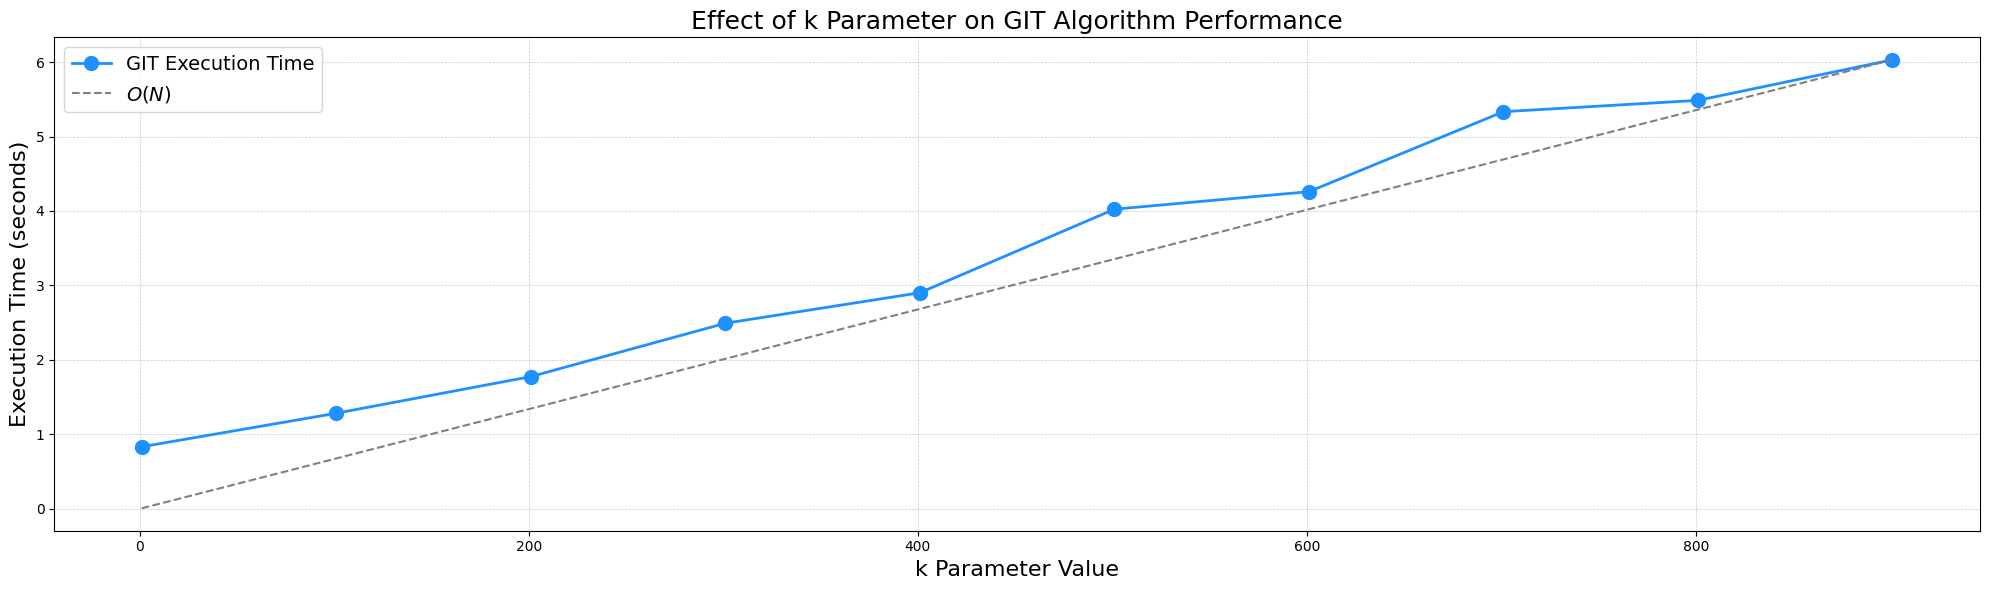

In [8]:
def benchmark_git_by_k(K_values, n_samples=10000, n_features=10, centers=5, random_state=2021):
    """
    Benchmark GIT algorithm's execution time over a range of 'k' values.

    :param K_values: A list of 'k' values to test the GIT algorithm with.
    :param n_samples: The number of samples to generate in the dataset.
    :param n_features: The number of features for each sample in the dataset.
    :param centers: The number of centers to generate for the synthetic dataset.
    :param random_state: Seed for the random number generator to ensure reproducibility.
    :return: A list of execution times for each 'k' value.
    """
    execution_times = []
    for k in tqdm(K_values, desc='Benchmarking GIT Performance - Varying K'):
        try:
            # Generate synthetic data
            np.random.seed(random_state)
            X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)
            
            # Time the execution of the GIT algorithm
            start_time = time.time()
            git = GIT(k=k, target_ratio=[1., 1])
            git.fit_predict(X)
            execution_times.append(time.time() - start_time)
        except Exception as e:
            print(f"An error occurred for k={k}: {e}")
            execution_times.append(None)
    return execution_times

# Define the range of 'k' values to test
K_values = [i for i in range(1, 1001, 100)]

# Run the benchmark
change_k_GIT = benchmark_git_by_k(K_values)
O_N = np.array(K_values) / max(K_values) * max(change_k_GIT)

# Plot the benchmark results
plt.figure(figsize=(20, 6))
plt.plot(K_values, change_k_GIT, 'o-', color='dodgerblue', markersize=10, lw=2, label='GIT Execution Time')
plt.plot(K_values, O_N, '--', color='grey', label='$O(N)$')
plt.xlabel('k Parameter Value', fontsize=16)
plt.ylabel('Execution Time (seconds)', fontsize=16)
plt.title('Effect of k Parameter on GIT Algorithm Performance', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save Figure
plt.savefig('./Benchmark Figures/git_algorithm_performance_varying_k.png')

plt.show()